In [63]:
import sys
sys.path.append('../..')

import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import HGate, TGate, ZGate, SGate, SdgGate, TdgGate
from utils.quantum_circuit import prepare_state, get_state_vector, calculate_fidelity, simulate, draw_state

In [64]:
n = 4
alice_bits = ''.join(f"{n}" for n in np.random.randint(2, size=n))
alice_bases_set = [[HGate], [HGate, SGate], [HGate, TGate], [HGate, ZGate]]
bob_bases_set = [[HGate], [SdgGate, HGate], [TdgGate, HGate], [ZGate, HGate]]

print(f"Alice bits: {alice_bits}")

Alice bits: 0001


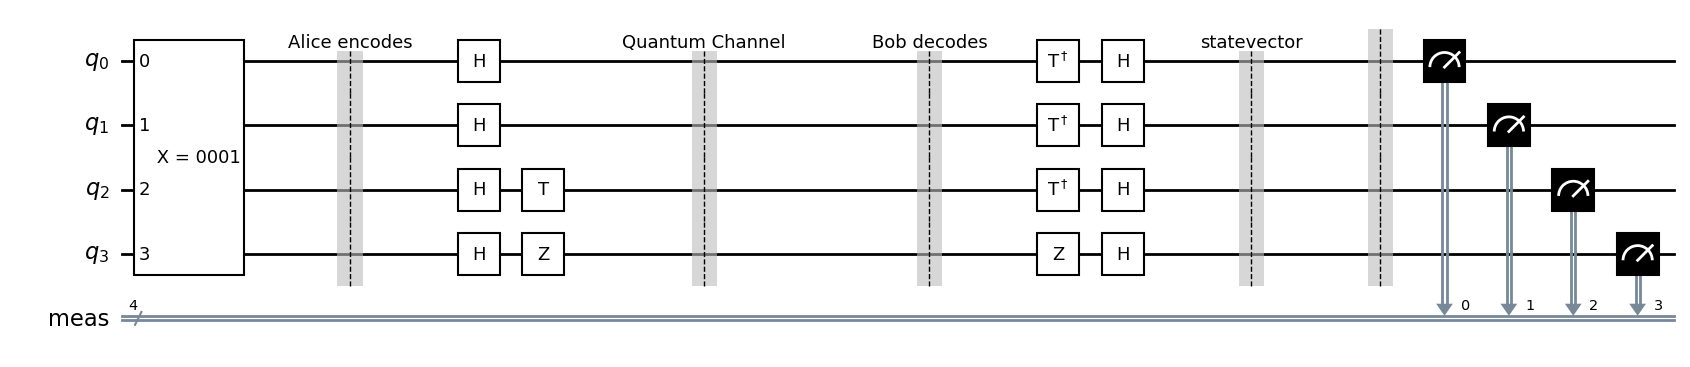

In [65]:
qc = QuantumCircuit(n)

# Alice prepares information state
qc.append(prepare_state(alice_bits, f" X = {alice_bits}"), [i for i in range(n)])

initial_state = get_state_vector(qc)

qc.barrier(label="Alice encodes")

# Alice encodes each qubit
for i in range(n):
    gates = alice_bases_set[np.random.choice(len(alice_bases_set))]
    for gate in gates:
        qc.append(gate(), [i])


qc.barrier(label="Quantum Channel")

qc.barrier(label="Bob decodes")

# Bob prepare his bases to measure
for i in range(n):
    gates = bob_bases_set[np.random.choice(len(bob_bases_set))]
    for gate in gates:
        qc.append(gate(), [i])

qc.save_statevector()

qc.measure_all()

qc.draw("mpl", style="bw", fold=-1)

In [66]:
result = simulate(qc)

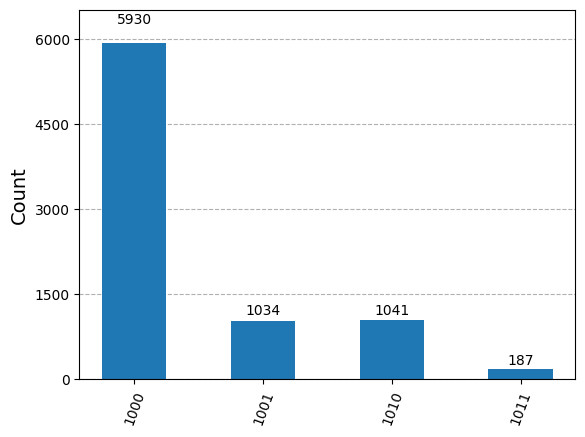

In [67]:
plot_histogram(result.get_counts())

In [68]:
draw_state(initial_state)

<IPython.core.display.Latex object>

In [69]:
last_state = result.get_statevector()
draw_state(last_state)

<IPython.core.display.Latex object>

In [70]:
calculate_fidelity(initial_state, last_state)

0.7285533905932748